<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/06_SVM/SVM_con_cuML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM con cuLM

Antes de correr la siguiente celda, seleccionar el GPU Tesla T4 en "Cambiar tipo de entorno de Ejecución"

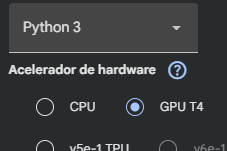

In [1]:
import numpy as np
import time
from sklearn import svm
from sklearn.datasets import make_classification

# Intentamos importar cuML
try:
    from cuml.svm import SVC as cuSVC
    CUM_AVAILABLE = True
except ImportError:
    print("cuML no está disponible. Se correrá solo sklearn.")
    CUM_AVAILABLE = False

# ==========================================================
# 1. Generación de dataset sencillo (100k muestras, 20 features)
# ==========================================================
X, y = make_classification(
    n_samples=100_000,
    n_features=20,
    n_informative=10,
    n_redundant=2,
    random_state=42
)

# ==========================================================
# 2. Entrenamiento SVM Sklearn (CPU)
# ==========================================================
clf_cpu = svm.SVC(kernel="rbf", C=1.0)

start_cpu = time.time()
clf_cpu.fit(X, y)
end_cpu = time.time()

print(f"⏱ Tiempo entrenamiento SVM CPU (sklearn): {end_cpu - start_cpu:.4f} segundos")

# ==========================================================
# 3. Entrenamiento SVM cuML (GPU)
# ==========================================================
if CUM_AVAILABLE:
    # cuML requiere FP32 y un array contiguo
    X32 = X.astype(np.float32)

    clf_gpu = cuSVC(kernel="rbf", C=1.0)

    start_gpu = time.time()
    clf_gpu.fit(X32, y)
    end_gpu = time.time()

    print(f"⚡ Tiempo entrenamiento SVM GPU (cuML): {end_gpu - start_gpu:.4f} segundos")
else:
    print("No se midió tiempo GPU porque cuML no está instalado.")


⏱ Tiempo entrenamiento SVM CPU (sklearn): 44.9793 segundos
⚡ Tiempo entrenamiento SVM GPU (cuML): 3.3630 segundos
